## Actividad 5 
### Supervivencia en python
### Lizbeth Ramos Saucedo          Matricula: 1885423       Gpo.42

#### 17 de marzo del 2023



In [1]:
 pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as pd 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from lifelines import KaplanMeierFitter


In [3]:
examenes = pd.read_excel('C:/Users/sauce/Downloads/supervivencia_examenes.xlsx')

In [4]:
examenes


,id,tiempo,examen,calificación,género
0,1,85,1,100.0,m
1,2,109,1,100.0,m
2,3,118,1,100.0,m
3,4,120,1,100.0,f
4,5,106,1,98.0,f
5,6,103,1,98.0,m
6,7,108,1,96.0,f
7,8,119,1,96.0,f
8,9,115,1,96.0,f
9,10,108,1,94.0,f


Tenemos los datos de 17 alumnos que presentaron el examen de estadística aplicada el año pasado a los cuales se les dio 2hrs (120 minutos) para contestar el examen. Las variables son las siguientes:

**id** es un identificador de alumno

**tiempo** es el tiempo medido en minutos que tardaron en contestar el examen

**examen** toma el valor de 1 si entrego el examen y 0 sino lo entrego

**calificación** es la calificación recibida en el examen

**género** es m:masculino y f:femenino.

El profesor de la materia considera que podemos emplear un análisis de 
supervivencia, ya que tenemos el tiempo en minutos desde que se les proporciona
a los alumnos el examen hasta que lo entregan respondido al profesor, donde el 
evento, es entregar el examen.
Asi que utilizando el enfoque de supervivencia usted ayudara al profesor a realizar 
el análisis del tiempo que tardan los alumnos en responder el examen. El análisis 
deberá realizarlo en una notebook de Python


a) Estadísticas descriptivas. Calcule el tiempo promedio que tardaron en 
responder los alumnos el examen y la calificación promedio obtenida.
El profesor sospecha que las alumnas responden más rápido el examen, 
calcule el tiempo promedio que tardaron en responder las alumnas y su 
calificación promedio, asi como el tiempo promedio que tardaron en 
responder los alumnos y su calificación promedio.
Elabore un print mostrando dichos resultados 

In [5]:
tt=examenes['tiempo'].mean()
tc=examenes['calificación'].mean()

In [6]:
mujeres = examenes[examenes['género'] =='f']
mt=mujeres['tiempo'].mean()
mc=mujeres['calificación'].mean()

In [7]:
hombres = examenes[examenes['género'] =='m']
ht=hombres['tiempo'].mean()
hc=hombres['calificación'].mean()

In [8]:
print(f'\nEl tiempo promedio que tardaron los alumnos en responder el examen es de  {round(tt,2)} min, con una calificaión promedio de {round(tc,2)}\n El tiempo prom de las mujeres es de {mt} min, con una calificación prom de {mc}\n El tiempo promedio de los hombres es de {round(ht,2)} min, con una calificación prom de {round(hc,2)} ')


El tiempo promedio que tardaron los alumnos en responder el examen es de  107.35 min, con una calificaión promedio de 90.71
 El tiempo prom de las mujeres es de 108.125 min, con una calificación prom de 93.0
 El tiempo promedio de los hombres es de 106.67 min, con una calificación prom de 88.67 


b) ¿Cómo crees que se comporta el riesgo de entregar el examen conforme 
transcurre el tiempo? ¿es constante, creciente, o decreciente? Según tu respuesta ajusta un modelo exponencial o Weibull, primero para todos los 
individuos y muestra la función de riesgo.

checar cual modelo es mejor exp o weibul ?? o no 

In [9]:
from lifelines import WeibullFitter 
from lifelines import ExponentialFitter

In [10]:
mexp = ExponentialFitter().fit(examenes['tiempo'],examenes['examen'] ) 
weib = WeibullFitter().fit(examenes['tiempo'],examenes['examen'] ) 

In [11]:
mexp.AIC_.round(2) , weib.AIC_.round(2)

(194.99, 130.35)

El "mejor" modelo es el que tiene el menor valor del AIC. El criterio de Akaike "prefiere" modelos mas simples en lugar de complejos.
De acuerdo con el criterio de Akaike (AIC) el modelo que mejor estima el tiempo de supervivencia es el modelo de Weibull, por lo cual será utilizado para nuestros calculos 

In [12]:
weib.hazard_

,Weibull_estimate
85.0000,0.004025
87.1875,0.005499
89.3750,0.007454
91.5625,0.010031
93.7500,0.013405
95.9375,0.017795
98.1250,0.023471
100.3125,0.030769
102.5000,0.040101
104.6875,0.051973


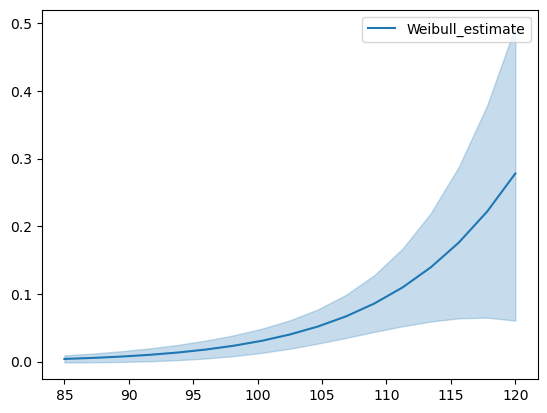

In [13]:
weib.plot_hazard();

El riesgo se comporta de manera creciente respecto al tiempo.

c) Ahora estima el mismo modelo que planteaste en el inciso anterior, pero para 
hombres y mujeres, y grafica ambas funciones de supervivencia juntas 
(empalmadas), ¿gráficamente quien tarda más en entregar el examen?

In [14]:
muj_weib = WeibullFitter().fit(mujeres['tiempo'],mujeres['examen'] ) 
muj_weib.survival_function_

,Weibull_estimate
90.000000,0.957135
94.285714,0.918982
98.571429,0.853640
102.857143,0.749329
107.142857,0.598397
111.428571,0.409298
115.714286,0.218295
120.000000,0.078625


In [15]:
hombres_weib = WeibullFitter().fit(hombres['tiempo'],hombres['examen'] ) 
hombres_weib.survival_function_

,Weibull_estimate
85.00,0.967787
89.25,0.941411
93.50,0.897448
97.75,0.827832
102.00,0.724549
106.25,0.584142
110.50,0.415119
114.75,0.243815
119.00,0.107858


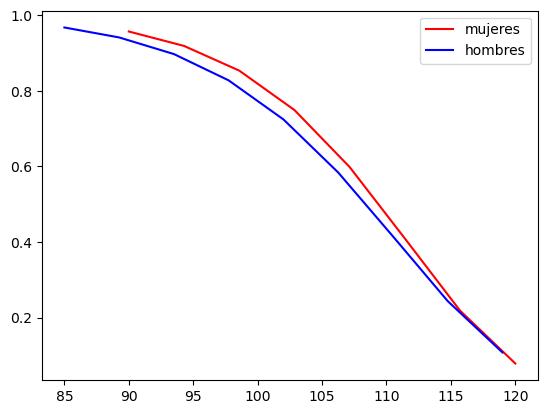

In [16]:
#grafica de supervivencia
muj_weib.plot_survival_function(label='mujeres',ci_show=False,color='red');
hombres_weib.plot_survival_function(label = 'hombres',ci_show=False, color='blue');

la funcion de supervivencia de las mujeres es mayor por lo cual tradan mas al entregar el examen 

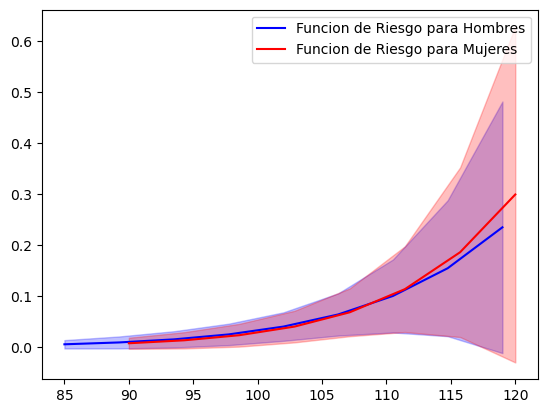

In [17]:
#grafiaca de riesgo 
EntregaH = WeibullFitter().fit(hombres['tiempo'],hombres['examen'])
EntregaM = WeibullFitter().fit(mujeres['tiempo'],mujeres['examen'])
EntregaH.plot_hazard(label = 'Funcion de Riesgo para Hombres',color='blue').legend()
EntregaM.plot_hazard(label = 'Funcion de Riesgo para Mujeres',color='red').legend()
plt.show()

graficamente se percibe que las mujeres tienen una menor funcion de riesgo, pero al minuto 115 esto cambia y su funcion de riesgo ahora es mayor que la de los hombres

d) Estime la función de supervivencia del tiempo de entrega del examen de 
todos los alumnos utilizando Kaplan-Meier, muestre los valores de la función 
de supervivencia, los valores del **intervalos de confianza al 95%**, asi como la 
gráfica respectiva de la función de supervivencia con sus intervalos

In [18]:
kt = KaplanMeierFitter().fit(examenes['tiempo'], examenes['examen'])
kt.survival_function_

,KM_estimate
timeline,
0.0,1.000000
85.0,0.941176
87.0,0.882353
90.0,0.823529
99.0,0.764706
103.0,0.705882
106.0,0.647059
108.0,0.529412
109.0,0.470588


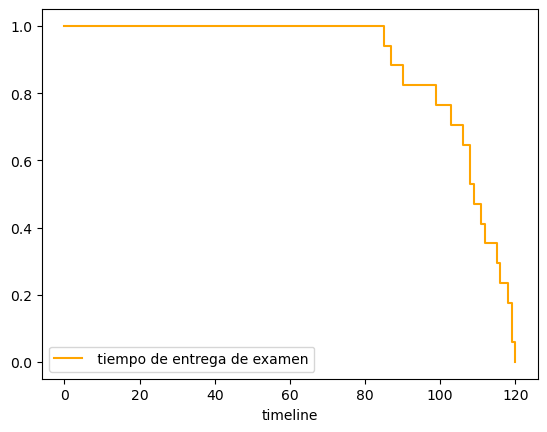

In [19]:
kt.plot_survival_function(label=' tiempo de entrega de examen',ci_show=False, color='orange');

e) Realice un gráfico donde muestre la función de supervivencia de Kaplan Meier de los alumnos (m) y de las alumnas (f) con sus respectivos intervalos 
de confianza. Y comente con base en la gráfica si es posible que el profesor 
tenga razón respecto a que las alumnas responden más rápido el examen

In [20]:
km = KaplanMeierFitter().fit(mujeres['tiempo'], mujeres['examen'])
kh = KaplanMeierFitter().fit(hombres['tiempo'], hombres['examen'])


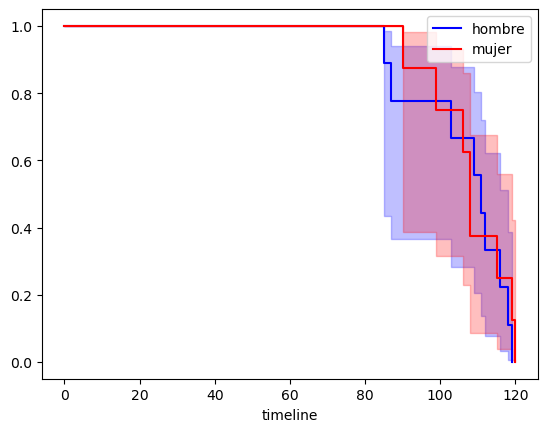

In [21]:
kh.plot_survival_function(label='hombre', color='blue' );
km.plot_survival_function(label='mujer', color='red');


Si los intervalos de confianza se traslapan significa que las funciones de supervivencia pueden ser iguales, graficamente es dificil la visualización de que género sobrevive más.


f) Realice el log rank test para probar si las funciones de supervivencia de 
alumnos y alumnas para responder el examen son iguales. Comente el 
resultado de la prueba de hipótesis y diga si el profesor tiene razón o no 

In [22]:
from lifelines.statistics import logrank_test

**Hipotesis** 

$H_o$: las funciones de supervivencia  entre hombre y mujeres son iguales 


$H_a$: la funciones de supervivencia son diferentes 

In [23]:
lrt = logrank_test(mujeres['tiempo'],hombres['tiempo'], mujeres['examen'], hombres['examen'])

si p value< alfa  rechazamos H0

In [24]:
lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.15 0.69      0.53

p value < alfa  
0.69 < 0.05

Por lo tanto NO se rechaza H0 y se concluye que las funciones de supervivencia son iguales.

g) El profesor tambien sospecha que quienes entregan el examen más rápido es 
porque no estudiaron, por tanto no saben que responder y entregan el 
examen casi inmediatamente. 
Estime un modelo de cox de riesgos proporcionales donde utilice como 
variables explicativas el género y la calificación obtenida, para explicar la 
función de riesgo de entregar el examen

In [25]:
from lifelines import CoxPHFitter

In [26]:
datos = pd.get_dummies(examenes,'genero',drop_first = True) 

In [27]:
datos

,id,tiempo,examen,calificación,genero_m
0,1,85,1,100.0,1
1,2,109,1,100.0,1
2,3,118,1,100.0,1
3,4,120,1,100.0,0
4,5,106,1,98.0,0
5,6,103,1,98.0,1
6,7,108,1,96.0,0
7,8,119,1,96.0,0
8,9,115,1,96.0,0
9,10,108,1,94.0,0


In [36]:
cph = CoxPHFitter()
cph.fit(datos,'tiempo','examen')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 17 total observations, 0 right-censored observations>
             duration col = 'tiempo'
                event col = 'examen'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 17
   partial log-likelihood = -33.31
         time fit was run = 2023-03-21 03:17:55 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
id             0.10       1.10       0.24            -0.36             0.56                 0.70                 1.75
calificación   0.06       1.06       0.13            -0.19             0.30                 0.83                 1.36
genero_m       0.50       1.66       0.80            -1.07             2.08                 0.34                 7.99

               cmp to    z    p   -log2(p)
covariate                                 
id               0.00 0.42 0.67       0.57
calificación     0.00 0.47 0.64       0.64
genero_m         0.00 0.63 0.53       0.92
---
Concordance = 0.51
Partial AIC = 72.61
log-likelihood ratio test = 0.40 on 3 df
-log2(p) of ll-ratio test = 0.09

h) Interprete los coeficientes de género y calificación obtenidos por el modelo 
de cox, recuerde señalar: 1) si el coeficiente es significativo (se rechaza Ho), 
en caso de ser significativo señala si aumentan el riesgo de entregar el 
examen, y el tamaño del efecto. Recuerde añadir cph.plot() para ayudarse con 
la interpretación



$H_o:\beta_i = 0$ Variable no afecta

$H_a:\beta_i \neq  0$ Variable si afecta

$\alpha = 0.05$

Si $\alpha<p$ entonces se rechaza $H_o$

"Coef" nos va a indicar si el riesgo aumenta o disminuye

Si coef<0 : el riesgo disminuye en 1-exp(coef) = %

Si coef>0 : el riesgo aumenta en exp(coef)-1 = %

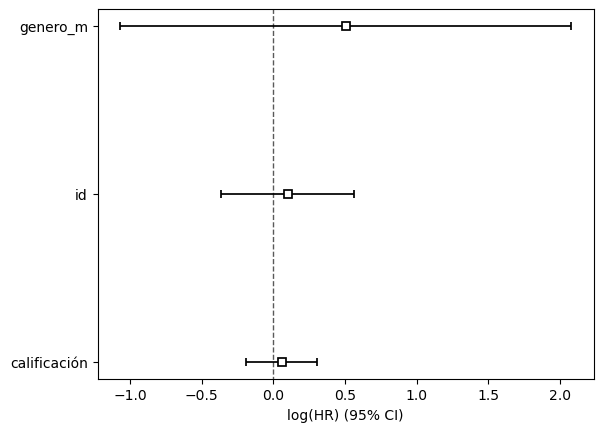

In [37]:
cph.plot();

**Calificación:**
  
    -> P-value > alfa
     0.64 > 0.05
     
    Rechazamos Ho:  lo cual significa que la variable calificacion afecta en el tiempo que se uso para el examen.
    Signo del coeficiente (+)
    -> El tiempo de entrega del examen aumenta la calificacion obtenida
   
   Como  coef>0 : el riesgo aumenta en exp(coef)-1 = %
    ->  1.06-1 = 6%
    la calificacion del alumno aumenta el riesgo del tiempo en el que entregue su examen en un 6%

**Genero_m ( Hombres 1 y Mujeres 0):**

    P-value > alfa
    -> 0.53 > 0.05
    
    Rechazamos Ho, por lo cual, el genero afecta en el tiempo que uso para la prueba.
    Signo del coeficiente (+)
    -> El tiempo de entrega del examen aumenta con el genero del estudiante
    
   Como  coef>0 : el riesgo aumenta en exp(coef)-1 = %
    ->  1.66-1 = 66%, el género del alumno aumenta el riesgo del tiempo en el que entregue su examen 

i) Utilice cph.plot_partial_effects_on_outcome(covariates='variable', 
values=[0,1]) para estimar las funciones de supervivencia de alumnos y 
alumnas de acuerdo con el modelo de cox ¿obtiene resultados similares al 
inciso c, es decir, coincide con las funciones de supervivencia de KaplanMeier?


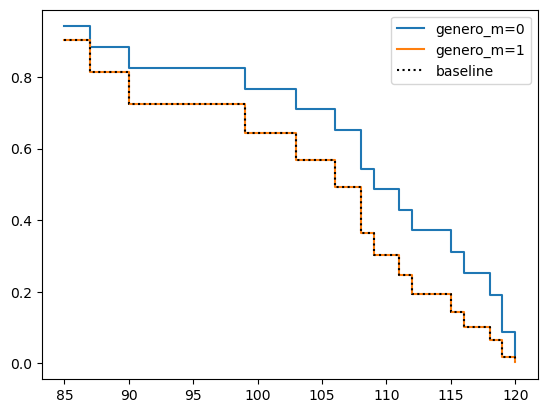

In [43]:
cph.plot_partial_effects_on_outcome(covariates='genero_m', values=[0,1]);

la funcion de supervivencia de los hombres es menor, por lo cual tardan menos en responder el examen

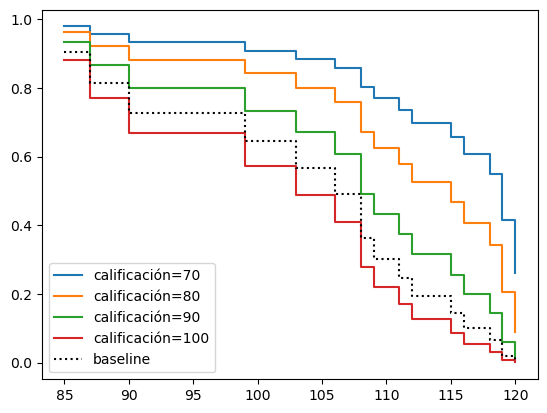

In [41]:
cph.plot_partial_effects_on_outcome(covariates='calificación',values=[70,80,90,100]);

¿Obtienes resultados similares al inciso C, es decir, coincide con las funciones de supervivencia de Kaplan-Meier?: 
los resultados graficos obtenidos con kaplan Meier, respecto al genero, si coinciden o al menos son similares apartir de que fue la entrega 

j) Por último, con base en la interpretación del modelo de cox y la significancia
de los coeficientes, comente si el profesor tiene razón al señalar que las 
alumnas responden en menor tiempo el examen, y si el profesor tambien 
tiene razón al señalar que los que entregan el examen rápido no estudiaron y 
por tanto obtienen menores calificación

Al inicio las entregas de los examenes fueron en tiempos muy similares como se logra apreciar en la grafica, por lo cual la teoria que los que no estudiaron entregan el examen mas rápido es falsa 

Respecto al modelo de Cox, ¿Las alumnas responden en menor tiempo el examen?:
    
Las mujeres en el grafico anterior se distinguen por la linea azul y tienen mayor supervivencia por lo cual se concluye que estas fueron quienes se tardaron mayor tiempo realizando la prueba